<a href="https://colab.research.google.com/github/oboem/oboem/blob/master/NMR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

In [2]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NMR/NMR3.csv')
df.head()

,Formic,sucrose,a+AC0-glucose,ethyl acetate ch2,isobutanol,methanol,b+AC0-glucose,acetaldehyde,acetic acid,eth ace ch3,1+AC0-propanol,3Me Butanol,2 me butanol,Unnamed: 13
0,13.61,0.00,0.00,0.00,93.03,34.69,0.00,45.48,234.67,180.69,354.96,540.87,371.67,NaN
1,9.08,0.00,0.00,0.00,127.69,31.01,0.00,22.74,164.66,125.76,402.29,647.89,443.98,NaN
2,9.08,0.00,0.00,0.00,103.97,41.00,0.00,44.40,229.74,209.61,437.79,559.67,370.22,NaN
3,15.88,0.00,0.00,0.00,62.02,62.55,0.00,94.20,308.62,365.72,473.29,763.58,464.22,NaN
4,22.69,0.00,0.00,0.00,207.95,42.05,0.00,81.21,159.73,185.03,548.22,899.52,786.72,NaN


In [8]:
print(df_new)

    Formic  sucrose  a+AC0-glucose  ethyl acetate ch2  isobutanol  methanol  \
0    13.61     0.00           0.00               0.00       93.03     34.69   
1     9.08     0.00           0.00               0.00      127.69     31.01   
2     9.08     0.00           0.00               0.00      103.97     41.00   
3    15.88     0.00           0.00               0.00       62.02     62.55   
4    22.69     0.00           0.00               0.00      207.95     42.05   
..     ...      ...            ...                ...         ...       ...   
85  106.64     0.00           0.00             221.17    85374.83 120239.43   
86   15.88     0.00           0.00               0.00   238432.61 159756.61   
87   40.84     0.00           0.00            1008.27   536954.47 139834.28   
88   13.61     0.00           0.00               0.00     3496.79  15149.91   
89   45.38     0.00           0.00               0.00  1137819.67 241346.71   

    b+AC0-glucose  acetaldehyde  acetic acid  eth a

In [13]:
df_new = df.drop('Unnamed: 13', axis=1)
df_new.head()

,Formic,sucrose,a+AC0-glucose,ethyl acetate ch2,isobutanol,methanol,b+AC0-glucose,acetaldehyde,acetic acid,eth ace ch3,1+AC0-propanol,3Me Butanol,2 me butanol
0,13.61,0.00,0.00,0.00,93.03,34.69,0.00,45.48,234.67,180.69,354.96,540.87,371.67
1,9.08,0.00,0.00,0.00,127.69,31.01,0.00,22.74,164.66,125.76,402.29,647.89,443.98
2,9.08,0.00,0.00,0.00,103.97,41.00,0.00,44.40,229.74,209.61,437.79,559.67,370.22
3,15.88,0.00,0.00,0.00,62.02,62.55,0.00,94.20,308.62,365.72,473.29,763.58,464.22
4,22.69,0.00,0.00,0.00,207.95,42.05,0.00,81.21,159.73,185.03,548.22,899.52,786.72


In [10]:
df_new.shape


(90, 13)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Formic             90 non-null     float64
 1   sucrose            90 non-null     float64
 2   a+AC0-glucose      90 non-null     float64
 3   ethyl acetate ch2  90 non-null     float64
 4   isobutanol         90 non-null     float64
 5   methanol           90 non-null     float64
 6   b+AC0-glucose      90 non-null     float64
 7   acetaldehyde       90 non-null     float64
 8   acetic acid        90 non-null     float64
 9   eth ace ch3        90 non-null     float64
 10  1+AC0-propanol     90 non-null     float64
 11  3Me Butanol        90 non-null     float64
 12  2 me butanol       90 non-null     float64
dtypes: float64(13)
memory usage: 9.3 KB


In [16]:
df_new.describe(include= 'all')

,Formic,sucrose,a+AC0-glucose,ethyl acetate ch2,isobutanol,methanol,b+AC0-glucose,acetaldehyde,acetic acid,eth ace ch3,1+AC0-propanol,3Me Butanol,2 me butanol
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,26.87,12.16,173.74,125.28,22623.06,8274.68,887.81,64.56,367.39,298.04,478.41,1011.33,742.18
std,19.07,65.01,476.86,213.62,134138.27,36056.74,3444.43,36.94,205.49,203.07,189.17,441.25,366.77
min,2.27,0.00,0.00,0.00,32.83,8.94,0.00,0.00,7.89,2.89,0.00,1.45,2.89
25%,13.61,0.00,0.00,0.00,131.79,41.66,0.00,40.06,230.97,133.35,357.92,806.61,467.84
50%,22.69,0.00,0.00,0.00,184.24,64.13,0.00,54.14,346.09,264.53,455.54,1109.94,812.02
75%,36.30,0.00,0.00,186.47,264.49,112.09,0.00,84.46,486.60,418.49,635.98,1297.22,1005.09
max,106.64,454.75,2465.64,1116.69,1137819.67,241346.71,27343.75,211.15,855.86,955.51,946.57,1877.14,1482.33


In [20]:
df = df_new
df.head()

,Formic,sucrose,a+AC0-glucose,ethyl acetate ch2,isobutanol,methanol,b+AC0-glucose,acetaldehyde,acetic acid,eth ace ch3,1+AC0-propanol,3Me Butanol,2 me butanol
0,13.61,0.00,0.00,0.00,93.03,34.69,0.00,45.48,234.67,180.69,354.96,540.87,371.67
1,9.08,0.00,0.00,0.00,127.69,31.01,0.00,22.74,164.66,125.76,402.29,647.89,443.98
2,9.08,0.00,0.00,0.00,103.97,41.00,0.00,44.40,229.74,209.61,437.79,559.67,370.22
3,15.88,0.00,0.00,0.00,62.02,62.55,0.00,94.20,308.62,365.72,473.29,763.58,464.22
4,22.69,0.00,0.00,0.00,207.95,42.05,0.00,81.21,159.73,185.03,548.22,899.52,786.72


In [21]:
# checking missing values
df.isnull().sum()

,0
Formic,0
sucrose,0
a+AC0-glucose,0
ethyl acetate ch2,0
isobutanol,0
methanol,0
b+AC0-glucose,0
acetaldehyde,0
acetic acid,0
eth ace ch3,0


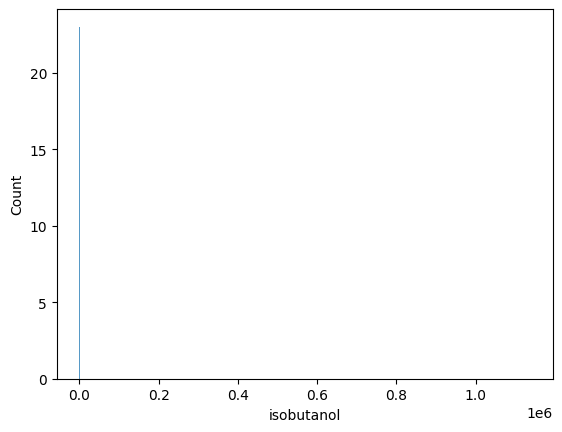

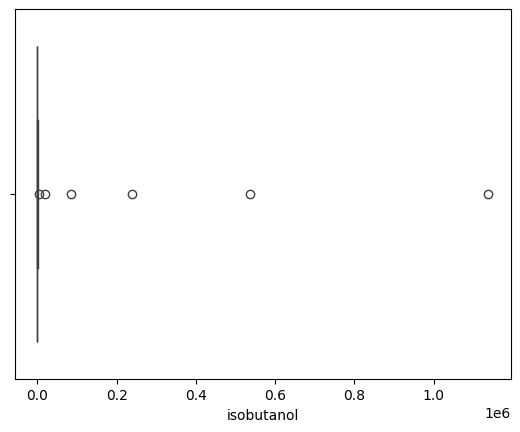

In [22]:
sns.histplot(data=df,x='isobutanol')
plt.show()
sns.boxplot(data=df,x='isobutanol')
plt.show()

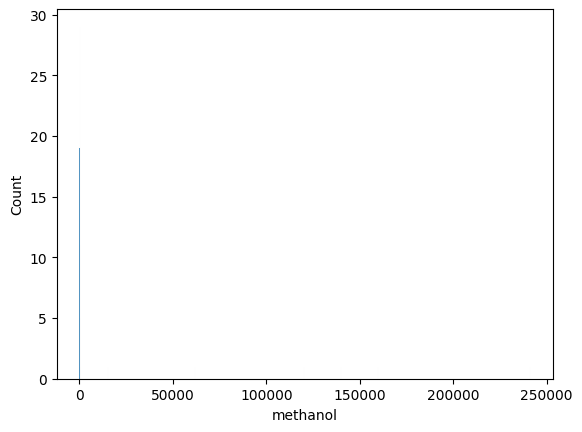

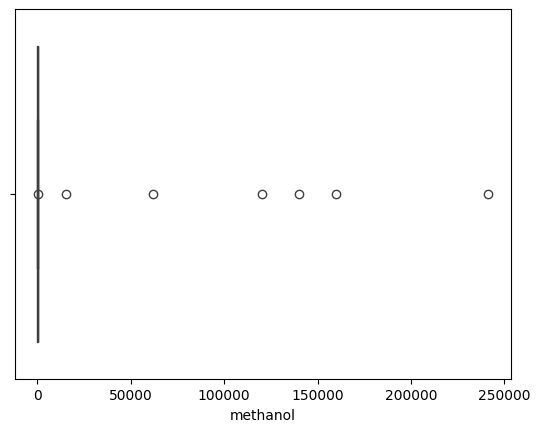

In [23]:
sns.histplot(data=df, x='methanol')
plt.show()
sns.boxplot(data=df, x='methanol')
plt.show()

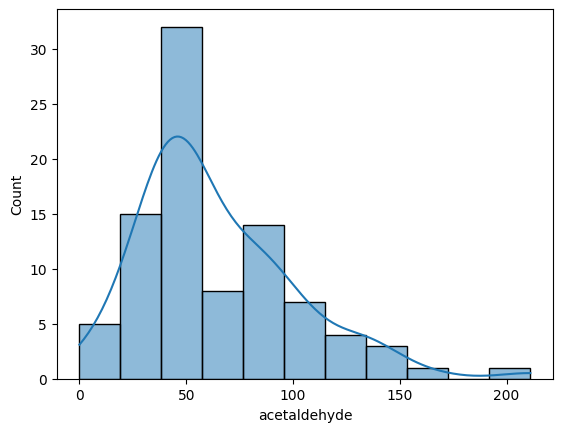

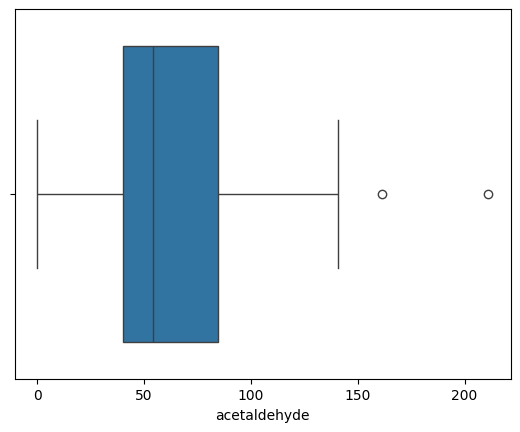

In [25]:
sns.histplot(data=df, x='acetaldehyde', kde = True)
plt.show()
sns.boxplot(data=df, x='acetaldehyde')
plt.show()

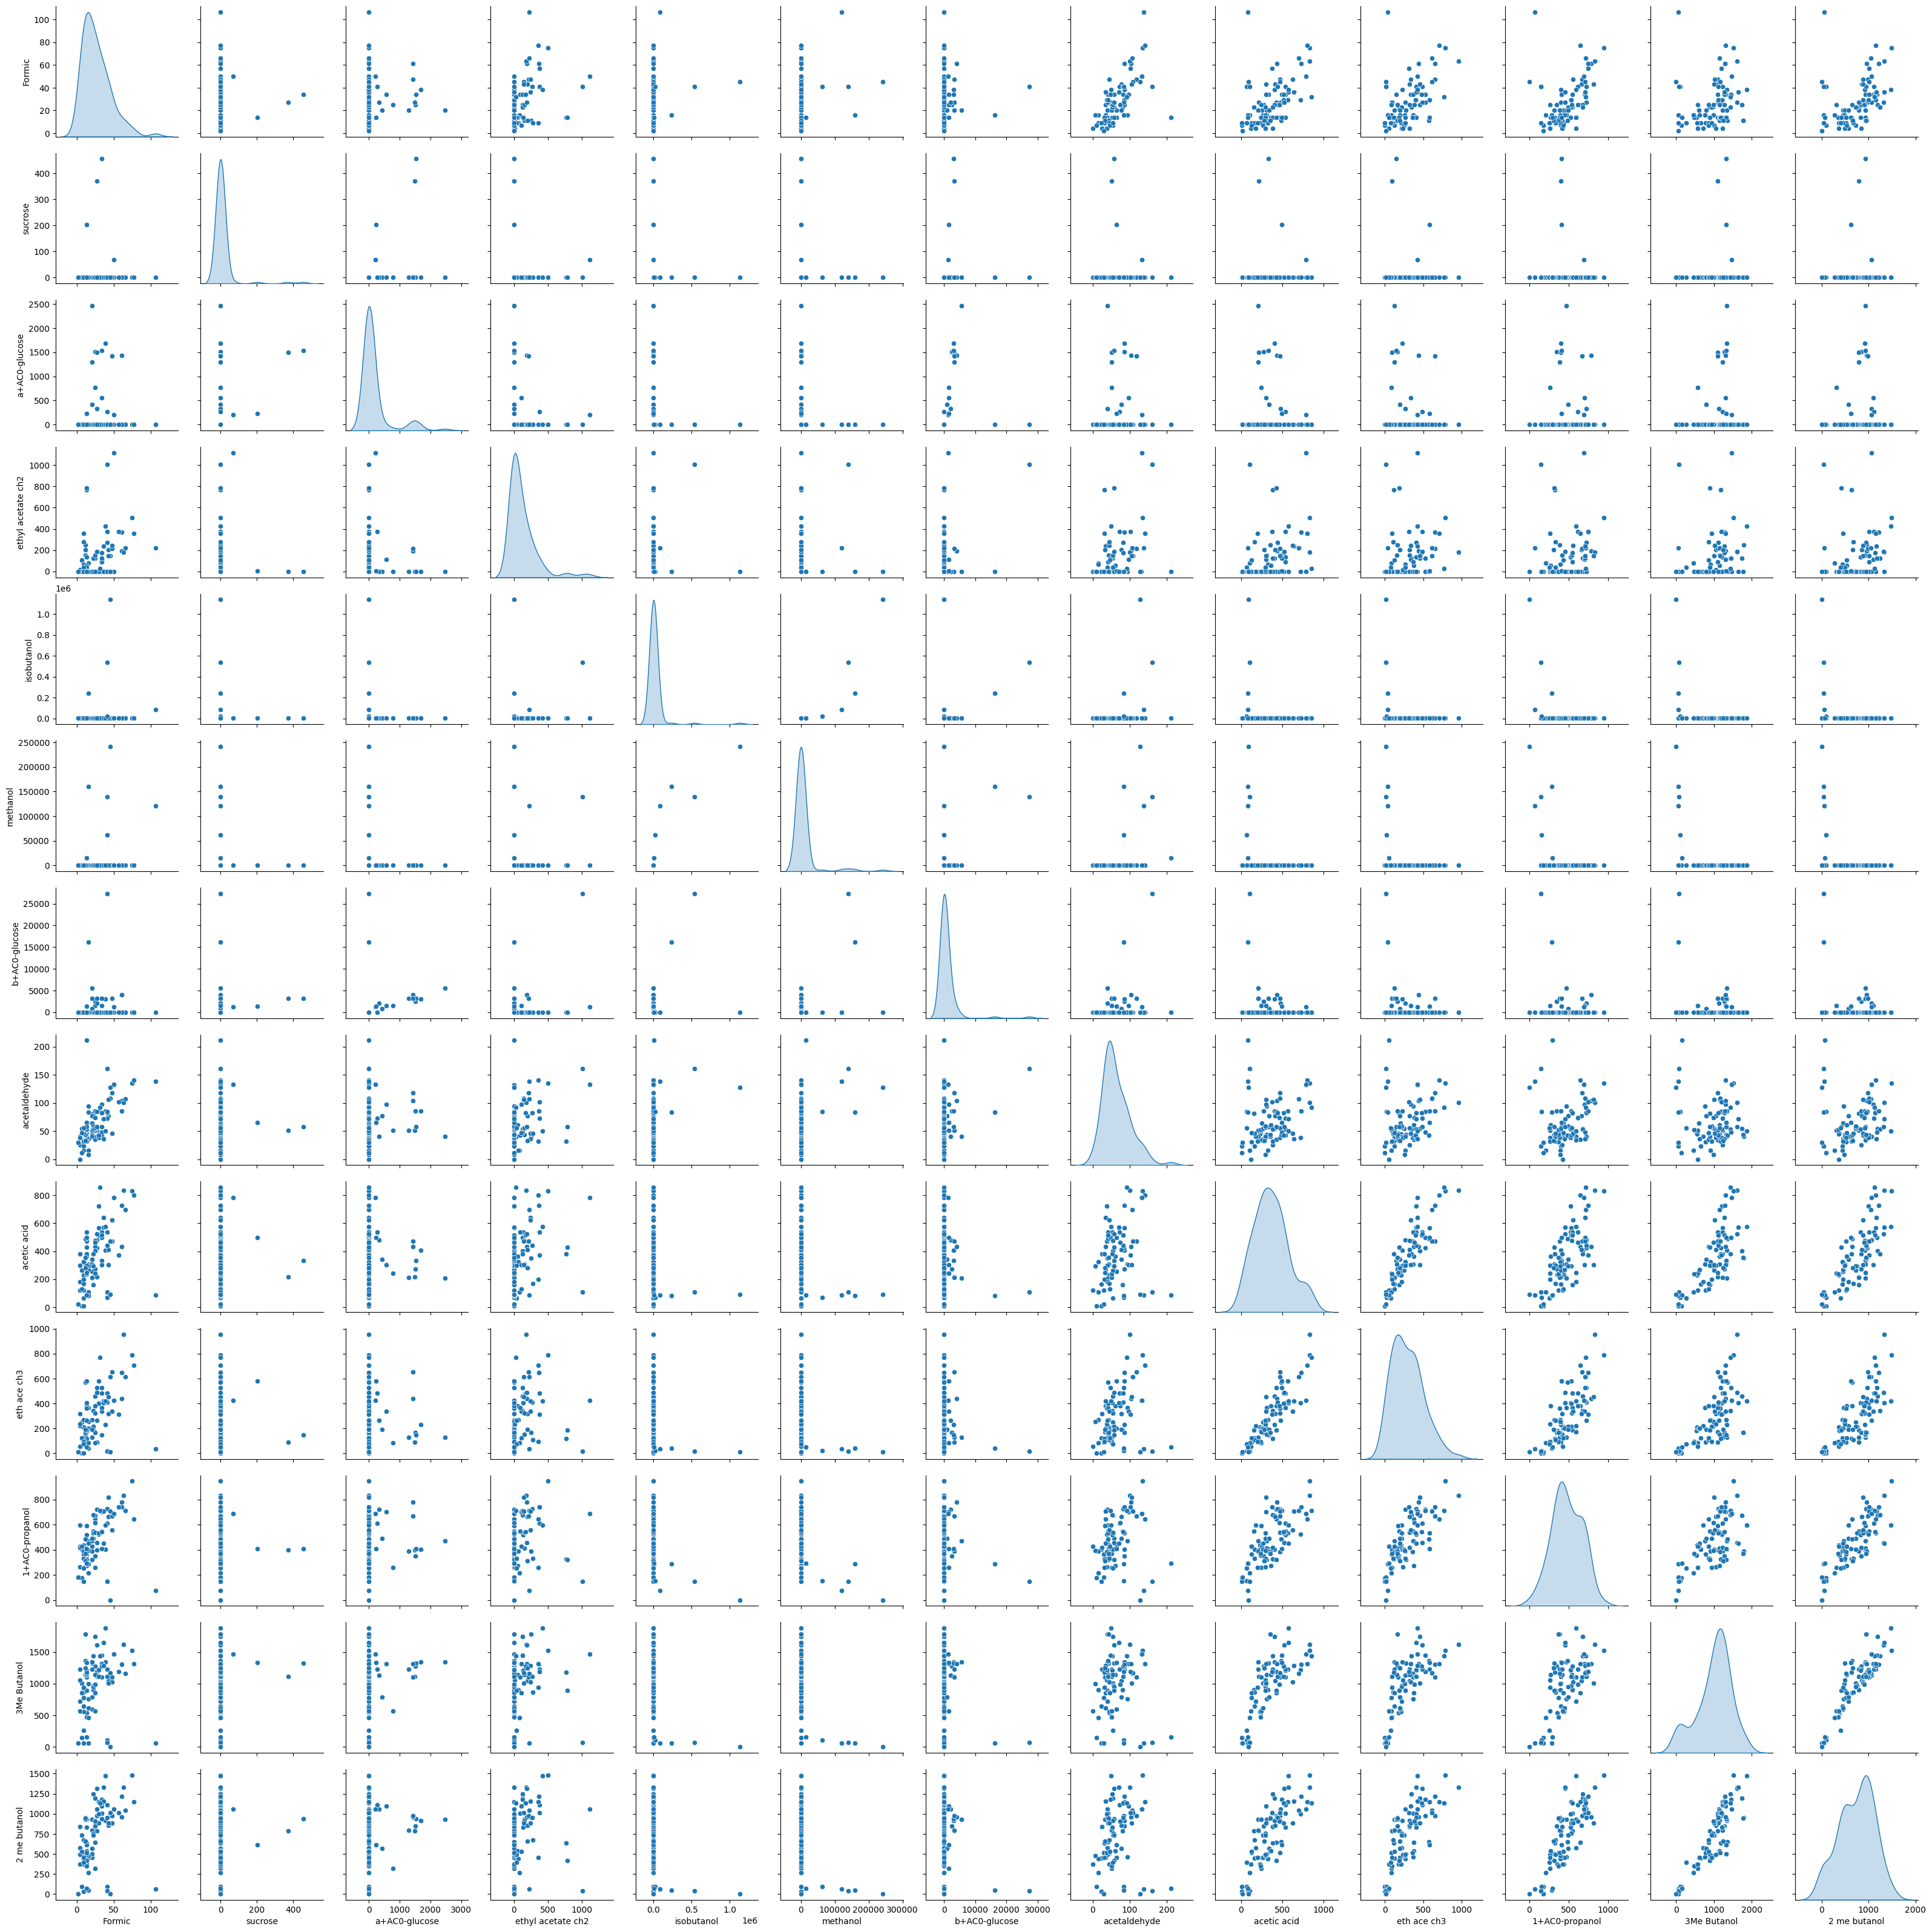

In [26]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

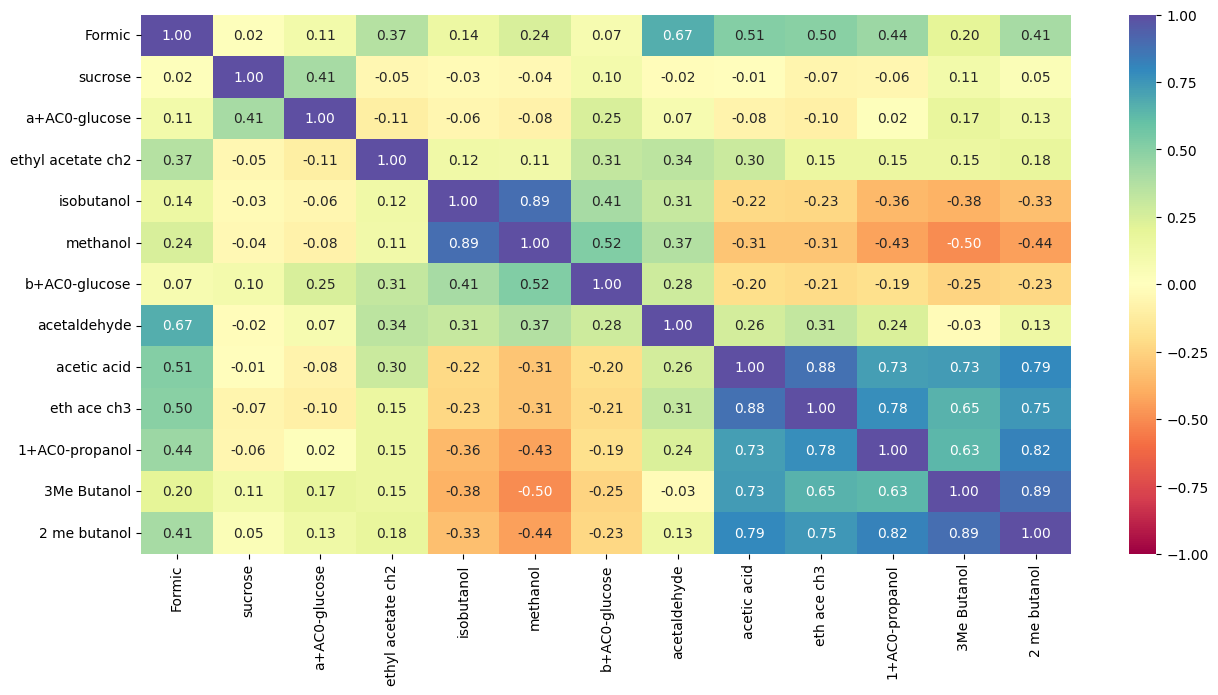

In [27]:
corr = df.corr(numeric_only=True)

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

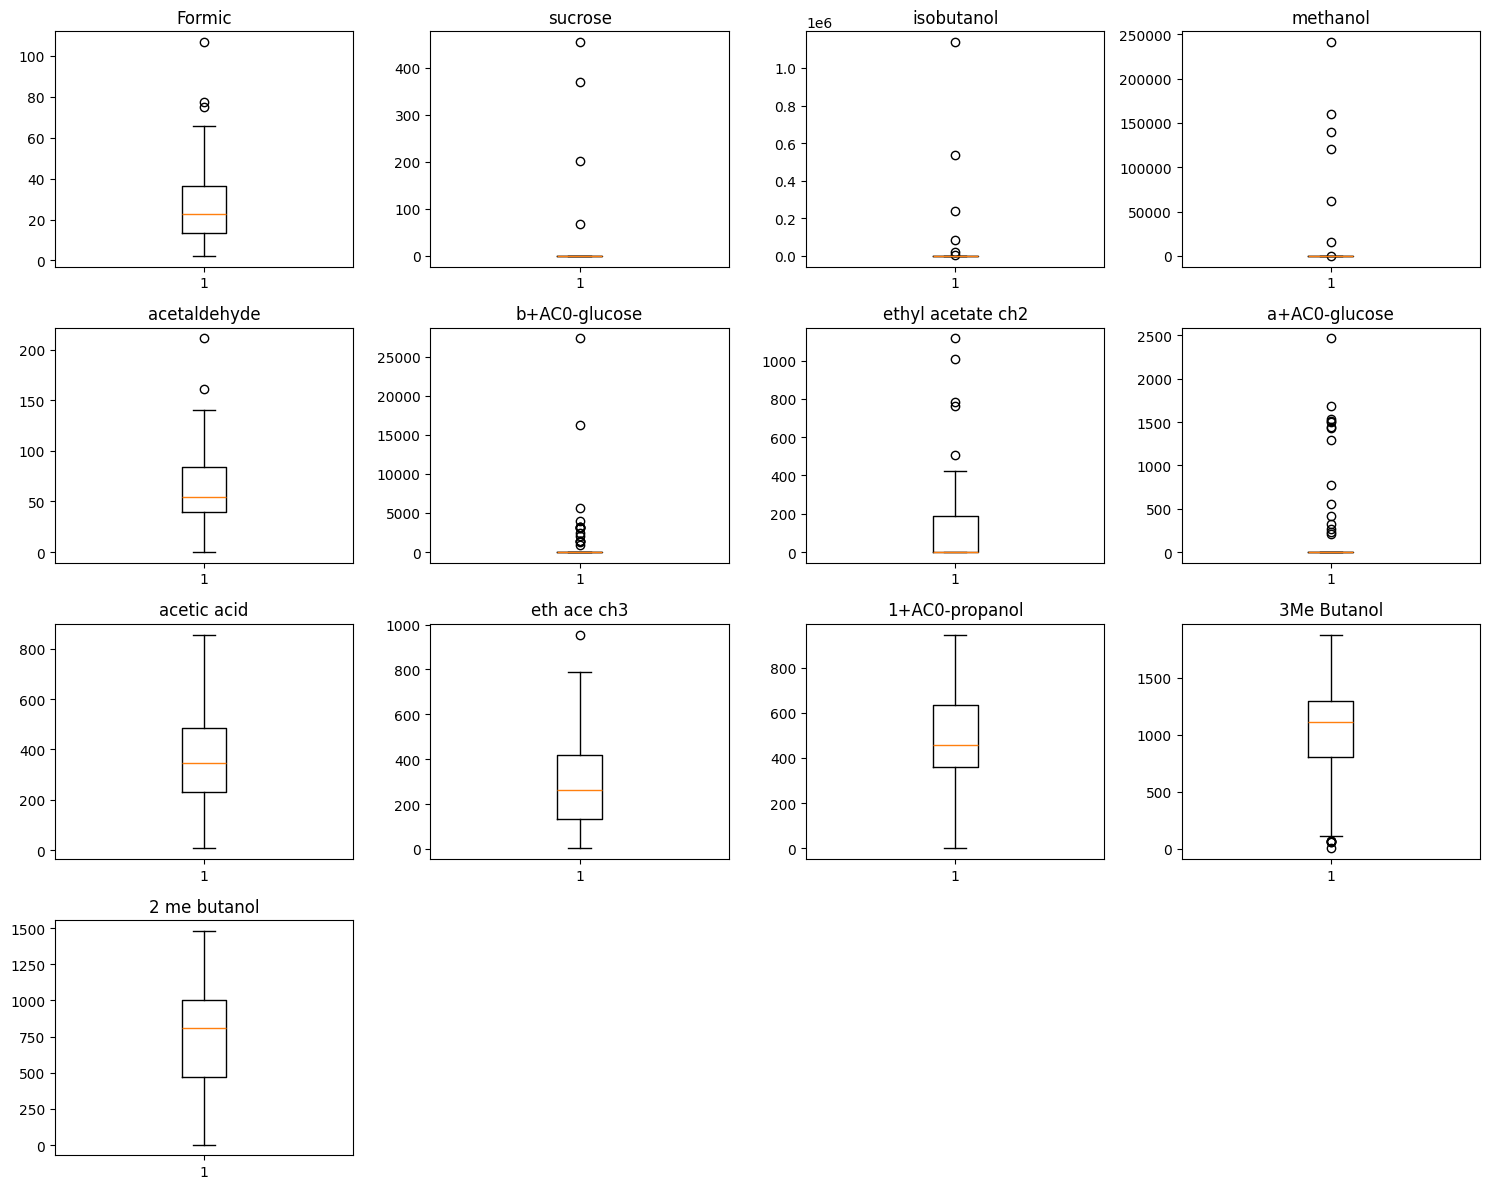

In [31]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Formic', 'sucrose', 'isobutanol', 'methanol','acetaldehyde', 'b+AC0-glucose', 'ethyl acetate ch2', 'a+AC0-glucose', 'acetic acid','eth ace ch3', '1+AC0-propanol','3Me Butanol', '2 me butanol' ]

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()